In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Case Study 1 - Dataset - Personal Loan Propensity.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,MALE,11/05/1967,516002,12,OWNED,MO,1,29800,23000,...,2,0,200000,23000.0,0,0,0,0,1,0
1,2,MALE,05/02/1988,517501,12,OWNED,MC,1,73502,40000,...,1,0,0,40000.0,500000,0,1,4,7,0
2,3,MALE,01/08/1970,516003,18,RENT,SC,2,46180,30000,...,1,0,30000,30000.0,0,1,0,0,0,0
3,4,MALE,22/05/1972,517213,18,OWNED,MO,2,29800,22100,...,2,0,42000,49900.0,0,0,0,2,6,0
4,5,FEMALE,12/04/1983,517503,12,OWNED,MO,2,29800,18500,...,1,0,15000,18500.0,0,0,0,0,0,0


In [3]:
from datetime import date, datetime 

def calculateAge(dob): 
    born = datetime.strptime(dob, '%d/%m/%Y').date()
    today = date.today() 
    try: 
        birthday = born.replace(year = today.year) 

    # raised when birth date is February 29 
    # and the current year is not a leap year 
    except ValueError: 
        birthday = born.replace(year = today.year, 
                month = born.month + 1, day = 1) 

    if birthday > today: 
        return today.year - born.year - 1
    else: 
        return today.year - born.year
print(calculateAge('22/05/1971'))

48


In [4]:
def datacleaning(data):
    data['V2'] = data['V2'].apply({'MALE':1, 'FEMALE':0}.get)
    
    data['V3'] = data['V3'].apply(calculateAge)
    
    data['V6'] = data['V6'].apply({'OWNED':0, 'RENT':1}.get)
    data['V6'] = data['V6'].fillna(data['V6'].median())
    
    data['V7'] = data['V7'].apply({'MC':0, 'MO':1, 'SC':2}.get)
    
    data['V11'] = data['V11'].apply({'L':0, 'M':1, 'F':2}.get)
    
    data['V12'] = data['V12'].apply({'NON-CASH':0, 'CASH':1}.get)

    return data

In [5]:
data = datacleaning(data)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,1,52,516002,12,0.0,1,1,29800,23000,...,2,0,200000,23000.0,0,0,0,0,1,0
1,2,1,31,517501,12,0.0,0,1,73502,40000,...,1,0,0,40000.0,500000,0,1,4,7,0
2,3,1,49,516003,18,1.0,2,2,46180,30000,...,1,0,30000,30000.0,0,1,0,0,0,0
3,4,1,47,517213,18,0.0,1,2,29800,22100,...,2,0,42000,49900.0,0,0,0,2,6,0
4,5,0,36,517503,12,0.0,1,2,29800,18500,...,1,0,15000,18500.0,0,0,0,0,0,0


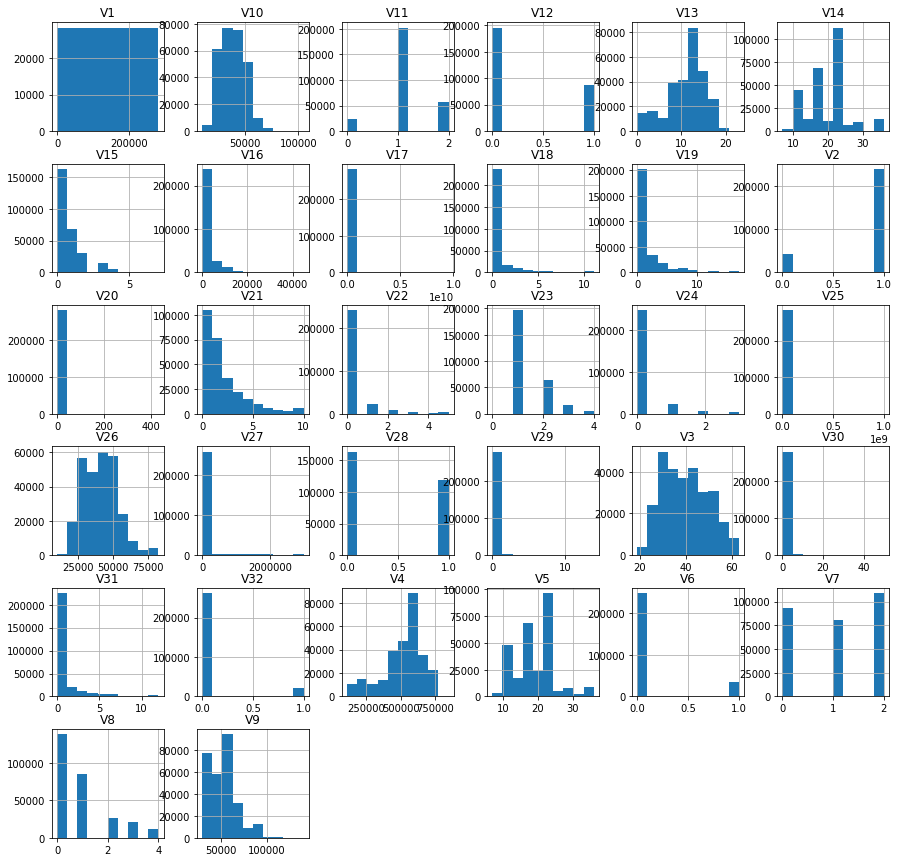

In [6]:
# fig1 = plt.figure(figsize = (10,10))
data.hist(figsize = (15,15))
plt.show()

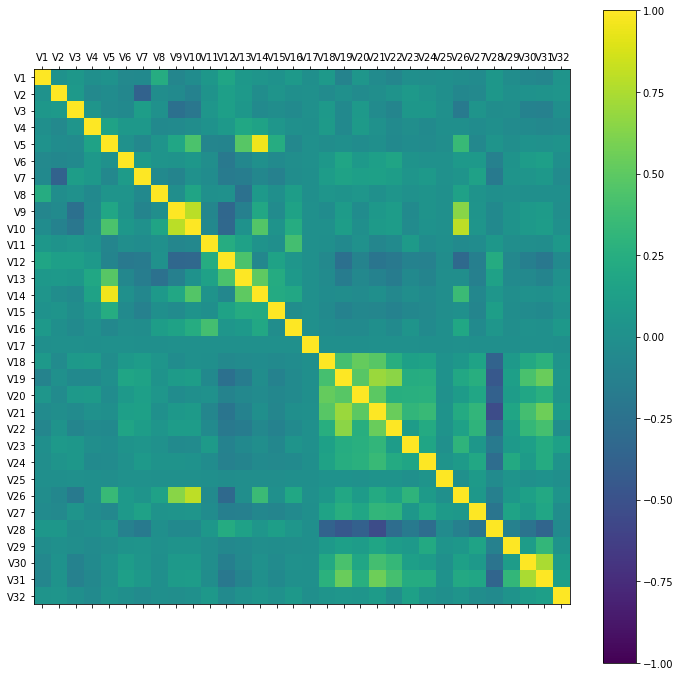

In [7]:
corr = data.corr()
names = list(map(str , range(1,33)))
for i in range(len(names)):
    names[i] = 'V'+names[i]
# print(names)
fig2 = plt.figure(figsize = (12,12))
ax = fig2.add_subplot(111)
cax = ax.matshow(corr, vmin = -1, vmax = 1)
fig2.colorbar(cax)
ticks = np.arange(0, 32, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(data.drop(['V32'], axis = 'columns'), data.V32, test_size = 0.3)

In [9]:
model = RandomForestClassifier(n_estimators=5, max_depth = 10)
# xTrain.head()
#     print('Yes')

In [10]:
# modelcv = cross_val_score(model, xTrain[['V3','V6', 'V4', 'V5', 'V8','V9']], yTrain, cv = 5)
modelcv = cross_val_score(model, xTrain, yTrain, cv = 5)

In [11]:
print(modelcv.mean())
# plt.plot(modelcv)

0.9272744712485526


In [12]:
# modelcv
mod = RandomForestClassifier()
mod.fit(xTrain, yTrain)
# data.tail(35)

C:\Users\krishnakant\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
predicted = mod.predict(xTest)
# print(predicted)
# count = 0
# for i in predicted:
#     if i == 1:
#         count+=1
# print('total', str(len(xTest)), 'x=1 are',str(count))

In [14]:
# cou = 0
# for i,j in zip(predicted, yTest):
#     if i==j:
#         cou+=1
# acc = (cou/len(predicted))*100
# print(acc)
print(predicted.sum(axis = 0))
print(yTest.sum(axis = 0))

293
6208


In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yTest, predicted))

0.9261646127382832


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yTest, predicted)

array([[78494,   176],
       [ 6091,   117]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     78670
           1       0.40      0.02      0.04      6208

    accuracy                           0.93     84878
   macro avg       0.66      0.51      0.50     84878
weighted avg       0.89      0.93      0.89     84878

